In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

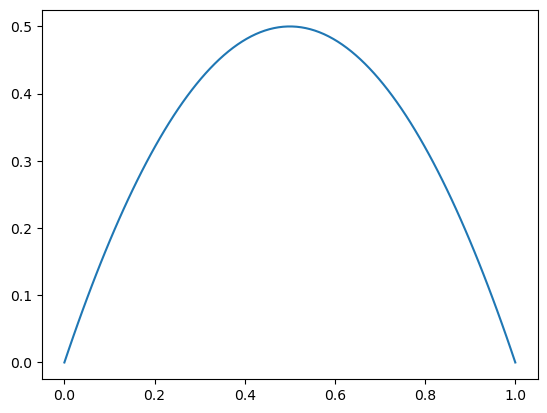

In [2]:
# Gini Index Graph

x=np.linspace(0,1,100)
y=1-(x**2+(1-x)**2)
plt.plot(x,y)
plt.show()

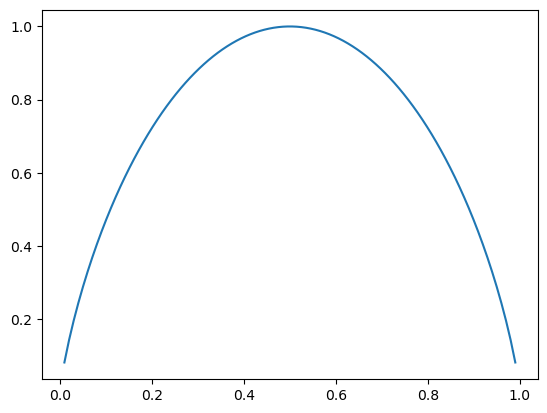

In [3]:
# Entropy Index

x=np.linspace(0,1,100)
y=-x*np.log2(x)-(1-x)*np.log2(1-x)
plt.plot(x,y)
plt.show()

In [4]:
file1="c:/temp/credit.csv"
data1=pd.read_csv(file1)
data1

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,repaid,furniture,1736,< 100 DM,4 - 7 yrs,3,female,none,...,real estate,31,none,own,1,1,1,none,yes,unskilled resident
996,< 0 DM,30,repaid,car (used),3857,< 100 DM,1 - 4 yrs,4,divorced male,none,...,building society savings,40,none,own,1,1,1,yes,yes,mangement self-employed
997,unknown,12,repaid,radio/tv,804,< 100 DM,> 7 yrs,4,single male,none,...,other,38,none,own,1,1,1,none,yes,skilled employee
998,< 0 DM,45,repaid,radio/tv,1845,< 100 DM,1 - 4 yrs,4,single male,none,...,unknown/none,23,none,for free,1,2,1,yes,yes,skilled employee


In [5]:
# tree 1: 전체, gini index

y=data1['default']
X1=pd.get_dummies(data1['credit_history'],drop_first=True)
X=pd.concat([X1,data1['age'],data1['amount']],axis='columns')

tree1=DecisionTreeClassifier(max_depth=3,random_state=0)
result1=tree1.fit(X,y)
result1

DecisionTreeClassifier(max_depth=3, random_state=0)

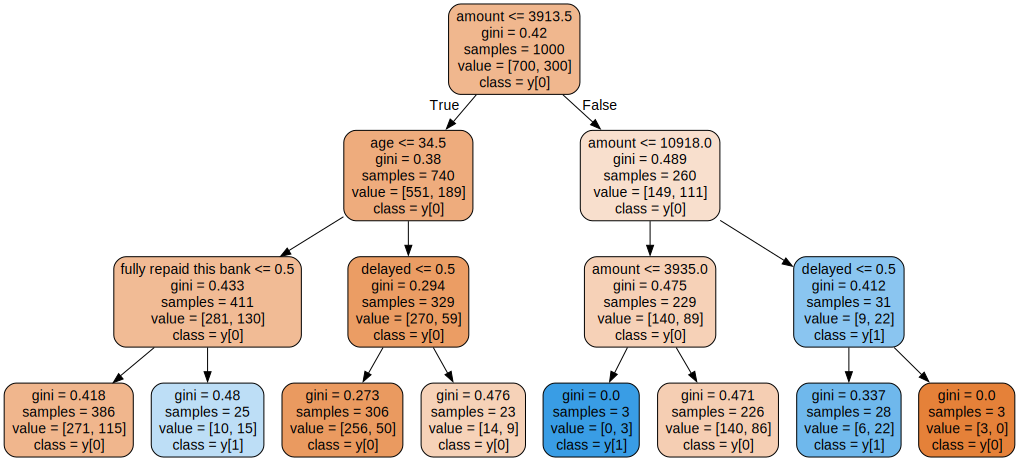

In [6]:
# tree 1 그리기

dot_data=export_graphviz(result1,feature_names=X.columns, filled=True, rounded=True, class_names=True)
tree_graph1=graphviz.Source(dot_data)
tree_graph1

In [7]:
# tree1 예측 성과

pred1=result1.predict(X)
confusion_matrix(y,pred1)

array([[684,  16],
       [260,  40]], dtype=int64)

In [8]:
# tree1 gini 계수 계산

1-((256/306)**2+(50/306)**2)

0.2733991199965824

In [9]:
# tree 1 해석
# 색, 진하기, 중요 변수, 예측 결과

In [11]:
# tree 2 , train test split, gini index

y=data1['default']
X1=pd.get_dummies(data1['credit_history'],drop_first=True)
X=pd.concat([X1,data1['age'],data1['amount']],axis='columns')
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,train_size=0.7)

tree2=DecisionTreeClassifier(max_depth=3,random_state=0)
result2=tree2.fit(X_train,y_train)
result2

DecisionTreeClassifier(max_depth=3, random_state=0)

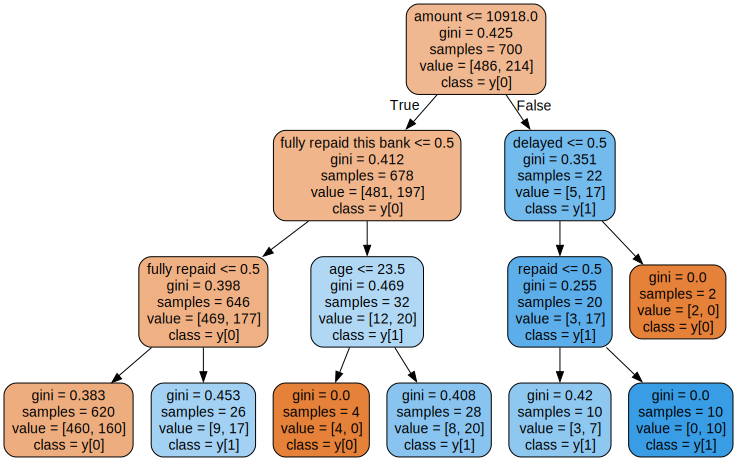

In [12]:
# tree 2 그리기

dot_data=export_graphviz(result2,feature_names=X.columns, filled=True, rounded=True, class_names=True)
tree_graph2=graphviz.Source(dot_data)
tree_graph2

In [13]:
# tree 2 예측 성과
pred2=result2.predict(X_test)
confusion_matrix(y_test,pred2)

array([[198,  16],
       [ 70,  16]], dtype=int64)

In [14]:
# CCR tree 2
(198+16)/(198+16+16+70)

0.7133333333333334

In [15]:
# tree 2 gini index 계산

1-((9/26)**2+(17/26)**2)

0.4526627218934911

In [17]:
# tree 2 해석

# 모든 데이터가 class=y[0 또는 1] 나올 확률
y_pred2=result2.predict_proba(X)
y_pred2

array([[0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       ...,
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452]])

In [18]:
# tree 3 , 전체 entropy

y=data1['default']
X1=pd.get_dummies(data1['credit_history'],drop_first=True)
X=pd.concat([X1,data1['age'],data1['amount']],axis='columns')

tree3=DecisionTreeClassifier(max_depth=3, random_state=0, criterion='entropy')
result3=tree3.fit(X,y)
result3

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

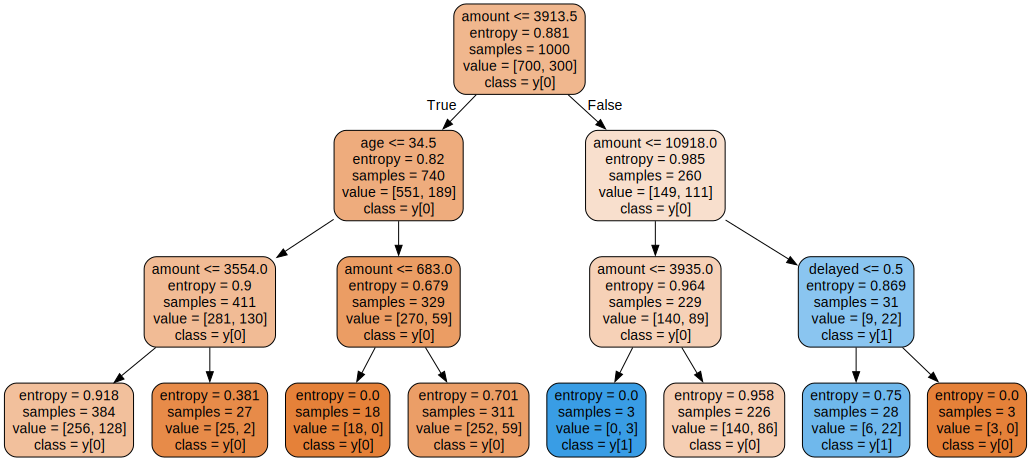

In [19]:
# tree 3 그리기

dot_data=export_graphviz(result3,feature_names=X.columns, filled=True, rounded=True, class_names=True)
tree_graph3=graphviz.Source(dot_data)
tree_graph3

In [21]:
# tree 3 예측 성과

pred3=result3.predict(X)
confusion_matrix(y,pred3)

array([[694,   6],
       [275,  25]], dtype=int64)

In [22]:
# CCR tree 3
(694+25)/(694+25+6+275)

0.719

In [23]:
# tree 3 entropy 계산하기
-(256/384)*np.log2(256/384)-(128/384)*np.log2(128/384)

0.9182958340544896

In [24]:
# tree 3, 각 데이터의 0 또는 1 될 획률 구하기
y_pred3=result3.predict_proba(X)
y_pred3

array([[0.81028939, 0.18971061],
       [0.61946903, 0.38053097],
       [0.81028939, 0.18971061],
       ...,
       [0.81028939, 0.18971061],
       [0.66666667, 0.33333333],
       [0.61946903, 0.38053097]])

In [26]:
# tree 4, train test split, entropy

y=data1['default']
X1=pd.get_dummies(data1['credit_history'],drop_first=True)
X=pd.concat([X1,data1['age'],data1['amount']],axis='columns')
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=0, train_size=0.7)

tree4=DecisionTreeClassifier(max_depth=3, random_state=0, criterion='entropy')
result4=tree4.fit(X_train,y_train)
result4

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

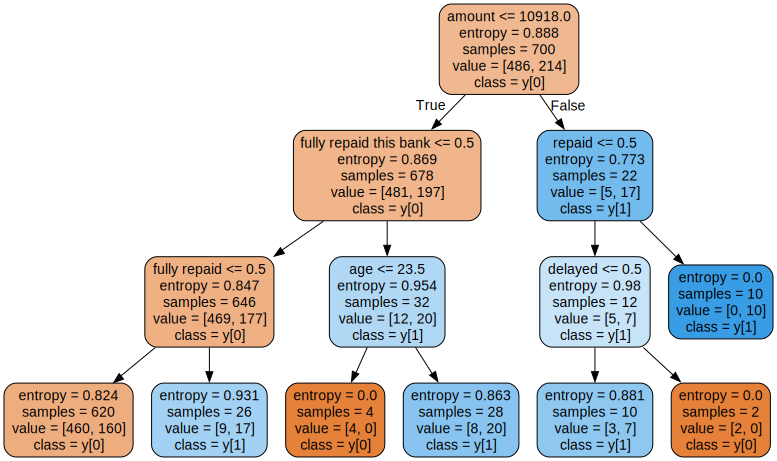

In [27]:
# tree 4 그리기

dot_data=export_graphviz(result4,feature_names=X.columns, filled=True, rounded=True, class_names=True)
tree_graph4=graphviz.Source(dot_data)
tree_graph4

In [28]:
# tree 4 entropy 계산 하기
# entropy와 gini index는 작을 수록 순도가 높다.

-(9/26)*np.log2(9/26)-(17/26)*np.log2(17/26)

0.9305861291319928

In [30]:
# tree 4 예측 성과
pred4=result4.predict(X_test)
confusion_matrix(y_test,pred4)

array([[198,  16],
       [ 70,  16]], dtype=int64)

In [31]:
# CCR 4
(198+16)/(198+16+16+70)

0.7133333333333334

In [33]:
# 각 데이터로 뭔가가 예측될 확률
y_pred4=result4.predict_proba(X)
y_pred4

array([[0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       ...,
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452]])

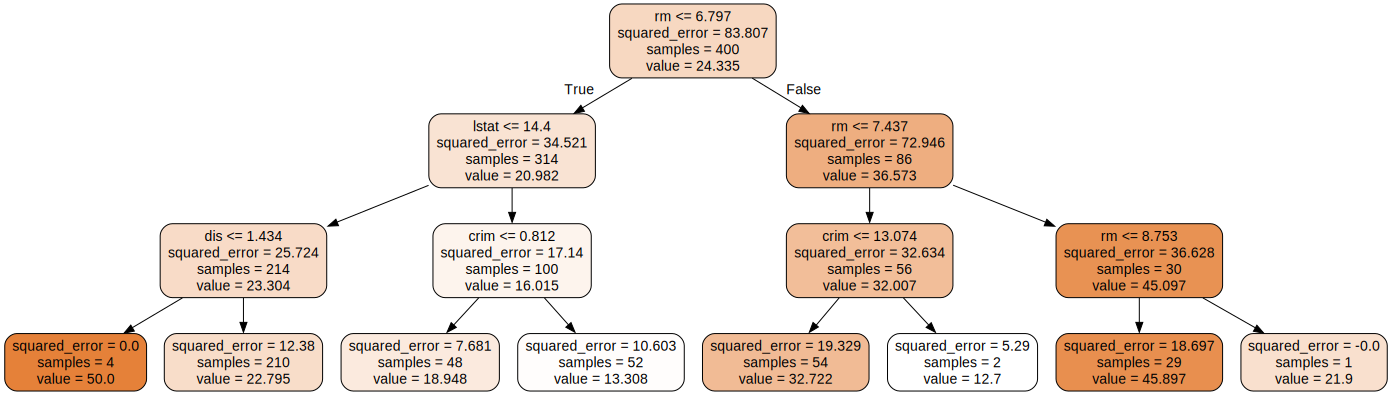

In [42]:
# Regression Tree 1, train test split

file2="c:/temp/Boston.csv"
data2=pd.read_csv(file2)
data2

y=data2['medv']
X=data2.drop('medv',axis=1)

X_train=X.iloc[:400,:]
X_test=X.iloc[400:,:]
y_train=y.iloc[:400]
y_test=y.iloc[400:]

# tree 5, y가 연속형->Regression tree, train test split, gini index
tree5=DecisionTreeRegressor(max_depth=3, random_state=0)
result5=tree5.fit(X_train,y_train)

# tree 5 그리기
dot_data=export_graphviz(result5,feature_names=X.columns, filled=True, rounded=True, class_names=True)
tree_graph5=graphviz.Source(dot_data)
tree_graph5

In [43]:
# tree 5 예측 성과
pred5=result5.predict(X_test)


In [44]:
mean_squared_error(y_test,pred5)

45.38108891089216

In [ ]:
# tree 5 해석
# value는 평균 값, squared error : MSE 같은거  , tree 크기, tree depth, 
# RSS 최소화 하도록 분기 , RSS=squared_error
# RSS와 MSE 비슷